#  EDA of Titanic dataset

In [1]:
#Dataset: https://www.kaggle.com/c/titanic/data

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
#import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
data.shape

(891, 15)

In [7]:
# get some statistics for my numeric features
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# check data types and null values for every feature 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
# count null values for every feature 
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

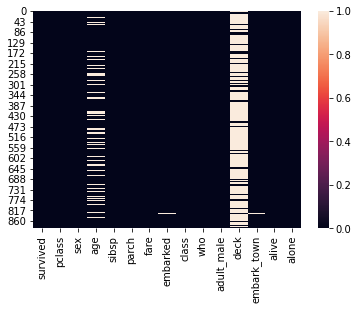

In [10]:
# using seaborn to visualize null values 
sns.heatmap(data.isnull())

In [11]:
# get correlation between numeric values 
corrmat= data.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

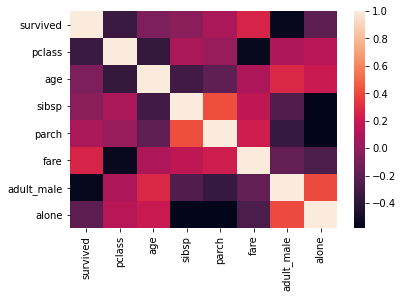

In [12]:
# visulaize correlation with sns 
sns.heatmap(corrmat)

In [13]:
list(data.columns)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

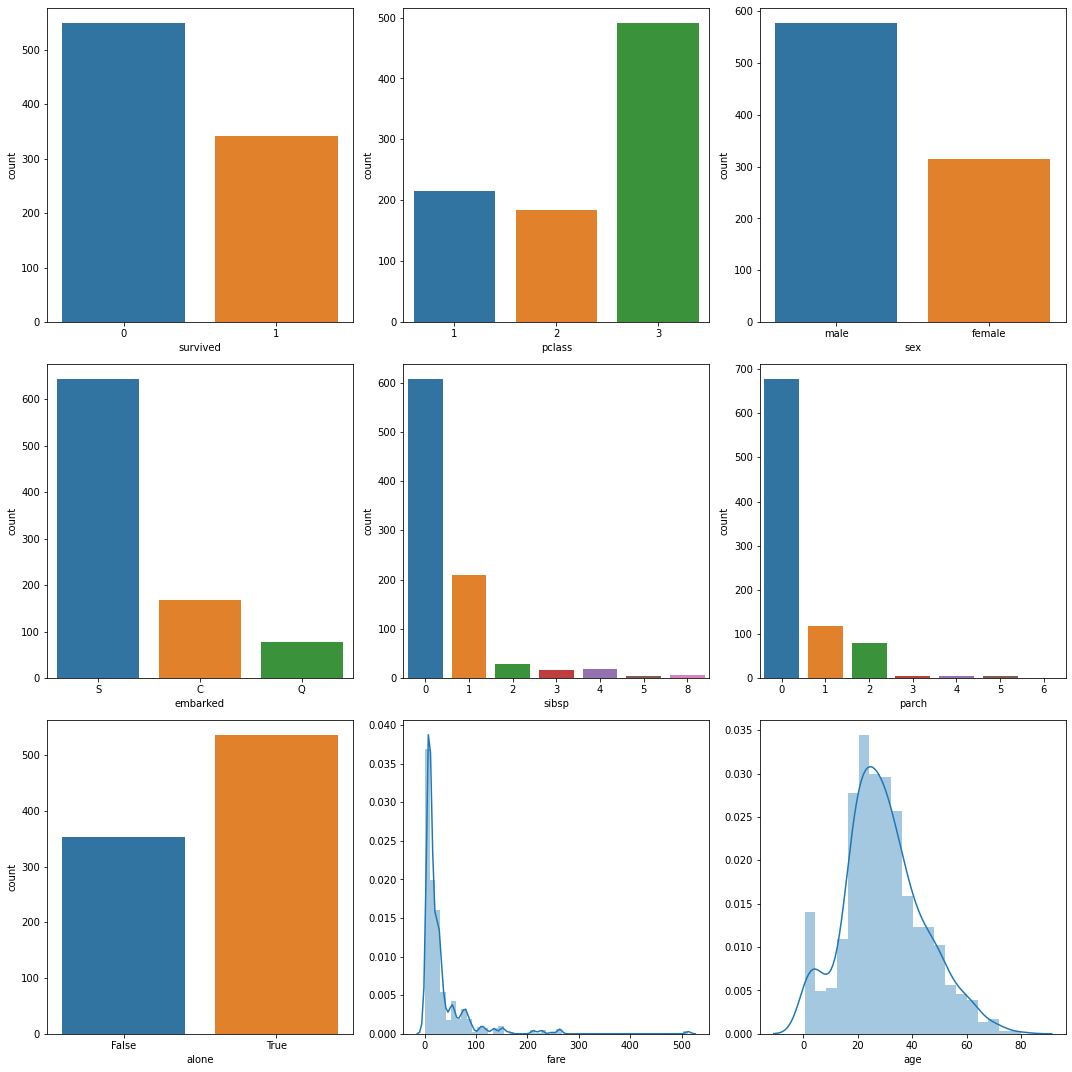

In [14]:
# univariant visulaization --> visaulize count of  some features using seaborn and pyplot and distribution plot for age and fare
fig,ax= plt.subplots(3,3 , figsize=(15,15))# 3 rows and 3 columns
sns.countplot('survived',data=data, ax=ax[0][0])
sns.countplot('pclass',data=data, ax=ax[0][1])
sns.countplot('sex',data=data, ax=ax[0][2])
sns.countplot('embarked',data=data, ax=ax[1][0])
sns.countplot('sibsp',data=data, ax=ax[1][1])
sns.countplot('parch',data=data, ax=ax[1][2])
sns.countplot('alone',data=data, ax=ax[2][0])
sns.distplot(data['fare'], kde=True,ax=ax[2][1] )
sns.distplot(data['age'] , kde=True,ax=ax[2][2] )
plt.tight_layout()

## analyzing survived

In [15]:
data['survived'].value_counts() #Survival	0 = No, 1 = Yes

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

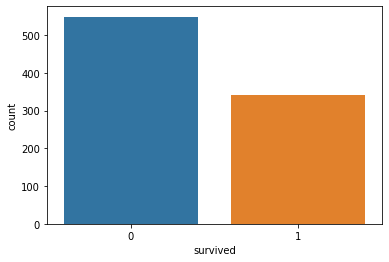

In [16]:
sns.countplot('survived' , data = data)

<AxesSubplot:ylabel='Frequency'>

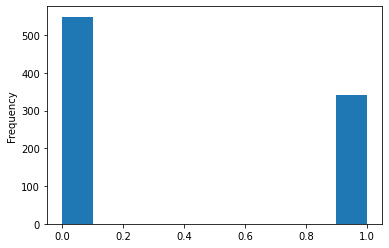

In [17]:
data['survived'].plot.hist()

<AxesSubplot:ylabel='survived'>

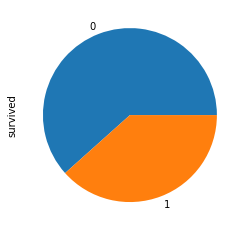

In [18]:
data['survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='survived'>

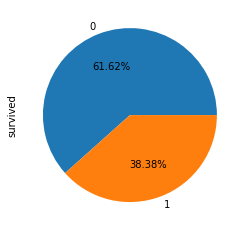

In [19]:
data['survived'].value_counts().plot.pie(autopct='%1.2f%%')

<AxesSubplot:ylabel='survived'>

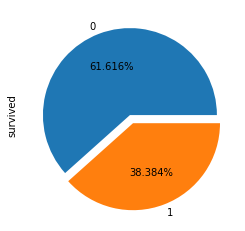

In [20]:
explode=(0,0.1)
data['survived'].value_counts().plot.pie(explode=explode,autopct='%1.3f%%')

## pcalss

In [21]:
gk=data.groupby(['pclass','survived'])['survived'].count() # grouping by pclass,survived then aggregation by survived

In [22]:
type(gk)

pandas.core.series.Series

In [23]:
gk

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [24]:
gk2=data.groupby(['pclass','survived']) # grouping by 'pclass','survived'

In [25]:
gk2.first() # get first values

sex   age  sibsp  parch     fare embarked   class    who  \
pclass survived                                                                
1      0           male  54.0      0      0  51.8625        S   First    man   
       1         female  38.0      1      0  71.2833        C   First  woman   
2      0           male  35.0      0      0  26.0000        S  Second    man   
       1         female  14.0      1      0  30.0708        C  Second  child   
3      0           male  22.0      1      0   7.2500        S   Third    man   
       1         female  26.0      0      0   7.9250        S   Third  woman   

                 adult_male deck  embark_town alive  alone  
pclass survived                                             
1      0               True    E  Southampton    no   True  
       1              False    C    Cherbourg   yes  False  
2      0               True    F  Southampton    no   True  
       1              False    D    Cherbourg   yes  False  
3      0               True    F  Southampton    no  False  
       1              False    G  Southampton   yes   True

In [26]:
gk2.get_group((1,0)) # get data for calss 1 and  notsurvived as a tuple of (1,0) 

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
27,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
30,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
34,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
35,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
815,male,NaN,0,0,0.0000,S,First,man,True,B,Southampton,no,True
822,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
867,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True


<AxesSubplot:xlabel='pclass', ylabel='count'>

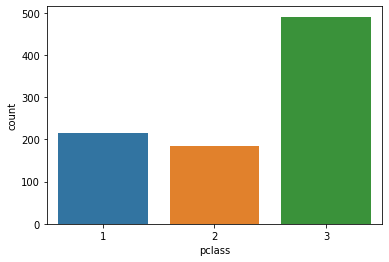

In [27]:
sns.countplot('pclass', data=data)

<AxesSubplot:xlabel='pclass', ylabel='count'>

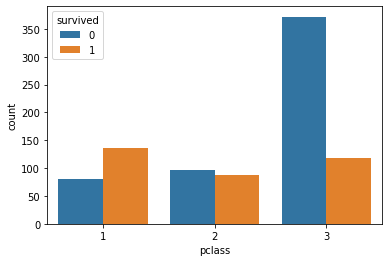

In [28]:
sns.countplot('pclass', data=data , hue='survived')

<AxesSubplot:ylabel='pclass'>

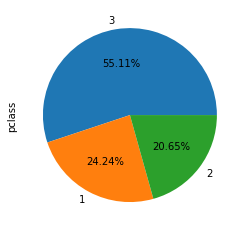

In [29]:
data['pclass'].value_counts().plot.pie(autopct='%1.2f%%')

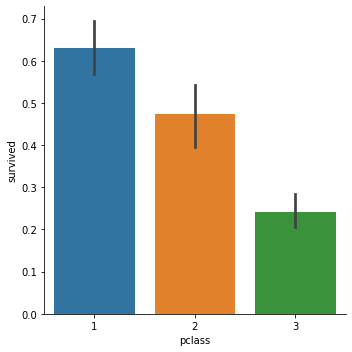

In [30]:
sns.catplot(x='pclass',y='survived', data=data, kind='bar')

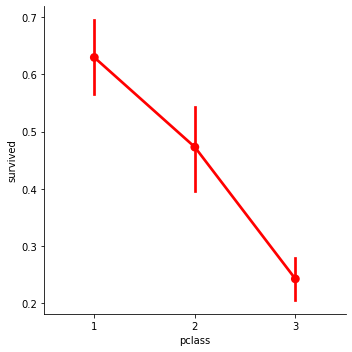

In [31]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point',color='red', data = data)

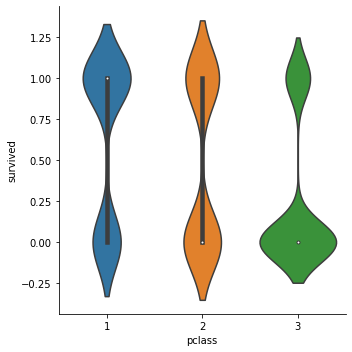

In [32]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'violin', data= data)
# probaility of surviving in class 1 is high 
# probaility of NOOOOt surviving in class 3 is high 
# median(white point) of surviving in class 1 is high 
# median of surviving in class 3 is low 

In [33]:
data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

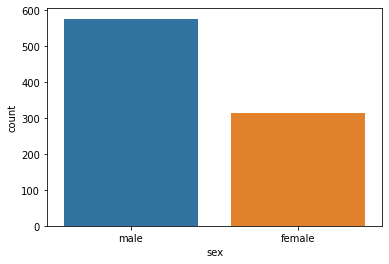

In [34]:
sns.countplot('sex', data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

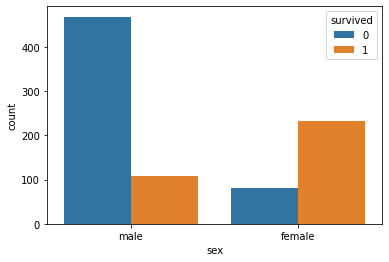

In [35]:
sns.countplot('sex',hue='survived', data=data)# 0 no and 1 is yes

<AxesSubplot:ylabel='sex'>

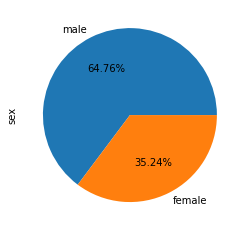

In [36]:
data['sex'].value_counts().plot.pie(autopct='%1.2f%%')

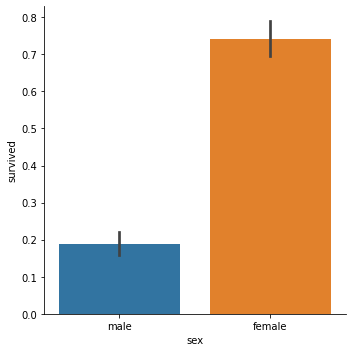

In [37]:
sns.catplot(x='sex', y='survived', kind='bar', data=data)

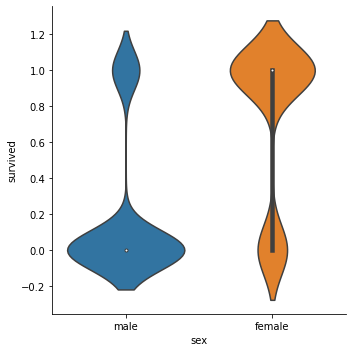

In [38]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = data)

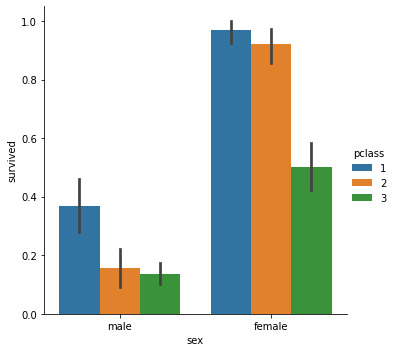

In [39]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = data, hue = 'pclass')

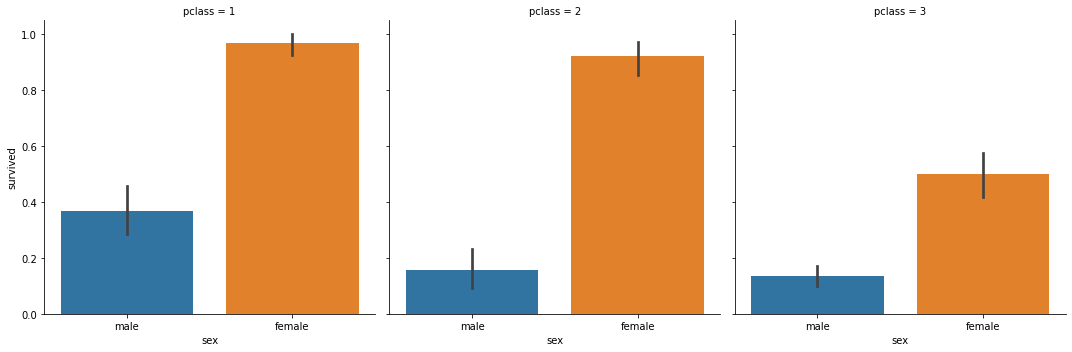

In [40]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = data, col = 'pclass')

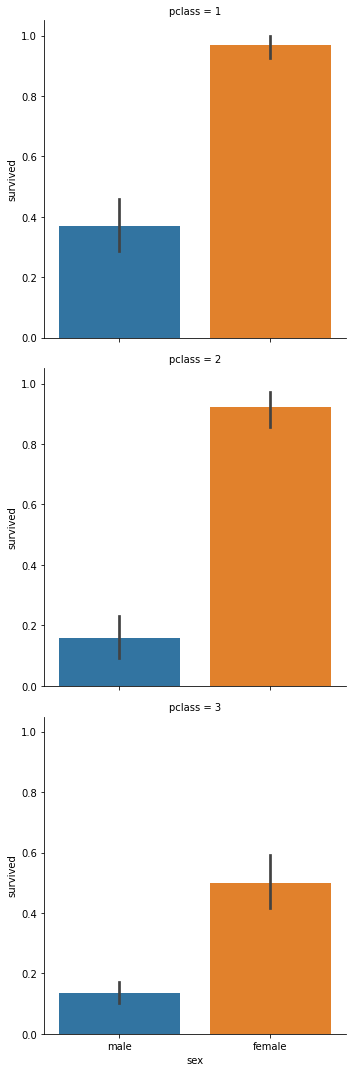

In [41]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = data, row = 'pclass')

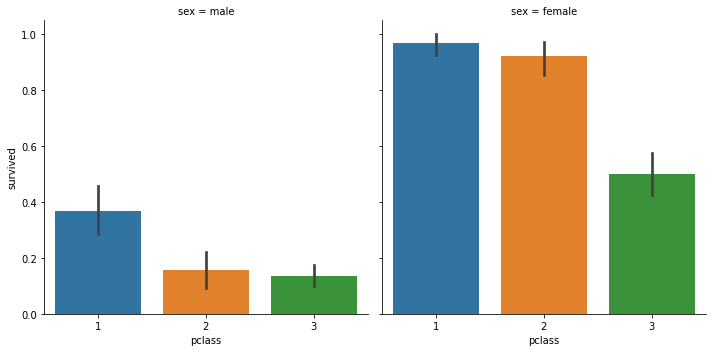

In [42]:
sns.catplot(x='pclass', y='survived',kind='bar', data=data, col='sex')

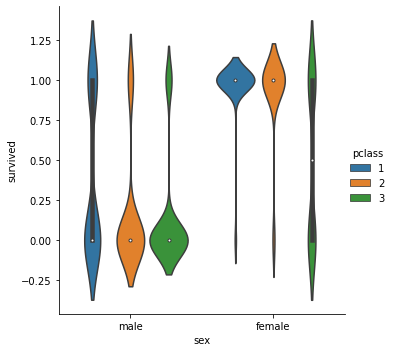

In [43]:
sns.catplot(x = 'sex', y = 'survived', kind = 'violin', data = data, hue = 'pclass')

# Age

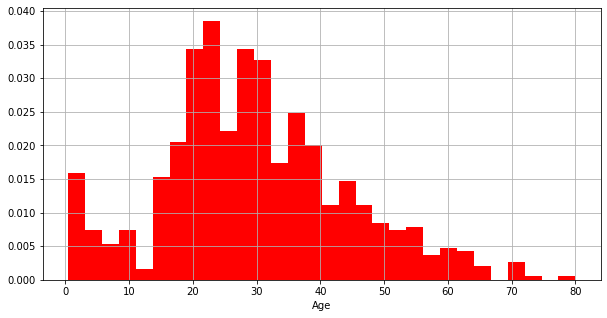

In [44]:
data['age'].hist(bins = 30, density = True, color = 'red', figsize = (10, 5))
plt.xlabel('Age')
plt.show()
# as per figure age has some frequnecy [0-10][20-40][40-65],

<AxesSubplot:xlabel='age'>

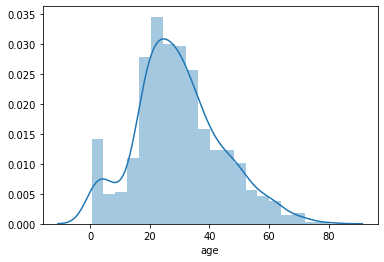

In [45]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='age'>

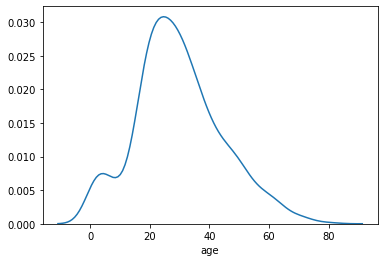

In [46]:
sns.distplot(data['age'] , hist=False)

<AxesSubplot:>

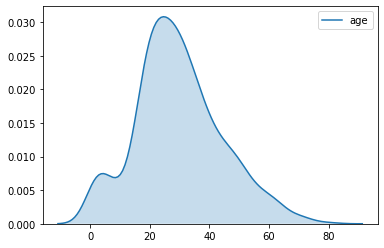

In [47]:
sns.kdeplot(data['age'], shade=True )

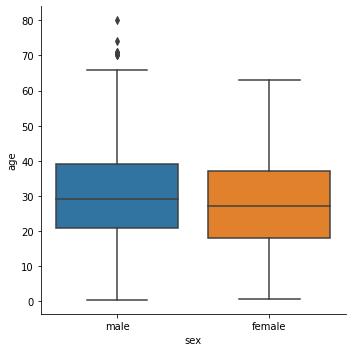

In [48]:
sns.catplot(x = 'sex', y = 'age', data = data, kind = 'box')

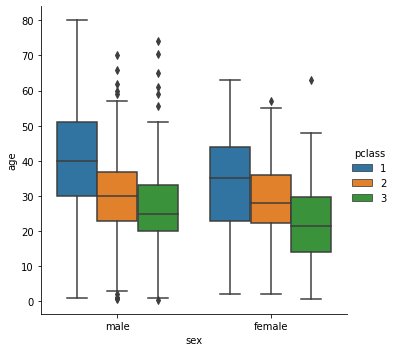

In [49]:
sns.catplot(x = 'sex', y = 'age', data = data, kind = 'box', hue = 'pclass')

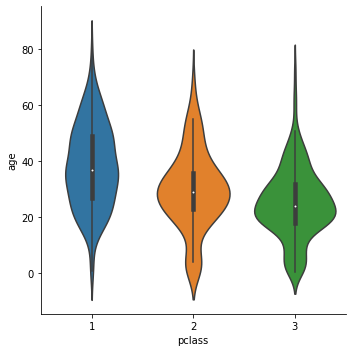

In [50]:
sns.catplot(x = 'pclass', y = 'age', data = data, kind = 'violin')

C:\Users\Hany-PC\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Hany-PC\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<AxesSubplot:xlabel='pclass', ylabel='age'>

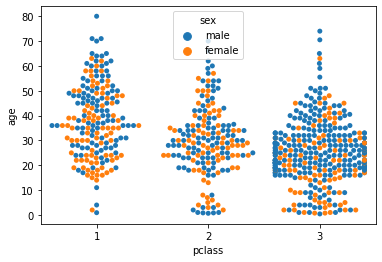

In [51]:
sns.swarmplot(x = 'pclass', y = 'age', data = data , hue='sex')

C:\Users\Hany-PC\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Hany-PC\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<AxesSubplot:xlabel='pclass', ylabel='age'>

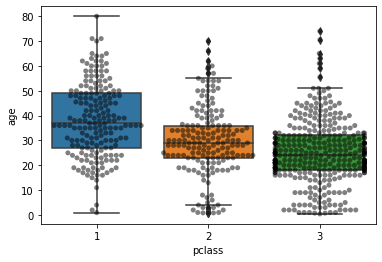

In [52]:
sns.boxplot(x = 'pclass', y = 'age', data = data )
sns.swarmplot(x = 'pclass', y = 'age', data = data, alpha=0.5 , color='black')